# Mann-Kendall Trend Test Example (MW -103s)

In [3]:
import numpy as np
from scipy.stats import norm, mstats
from scipy.integrate import quad
import statistics as stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def mann_kendall(x, alpha=0.05):
    n = len(x)
    coeff_var = stats.stdev(x) / stats.mean(x)
    
    # Calculate S #
    S = 0
    for k in range(n - 1):
        for j in range(k + 1, n):
            S += np.sign(x[j] - x[k])
            
    # Calculate the unique data #
    unique_x = np.unique(x)
    g = len(unique_x)
    
    # Calculate the variance of S #
    if n == g:
        var_S = (n * (n - 1) * (2 * n + 5)) / 18
    else:
        tp = np.zeros(unique_x.shape)
        for i in range(g):
            tp[i] = sum(unique_x[i] == x)
        var_S = (n * (n - 1) * (2 * n + 5) + np.sum(tp * (tp -1) * (2 * tp + 5))) / 18
        
    # Calculate Z statistic #
    if S > 0:
        Z = (S - 1) / np.sqrt(var_S)
    elif S == 0:
        Z = 0
    else:
        Z = (S + 1) / np.sqrt(var_S)
        
    # Calculate the p-value #
    p = 2 * (1 - norm.cdf(abs(Z)))
    h = abs(Z) > norm.ppf(1 - alpha / 2)
    
    if (Z < 0) and h:
        trend = 'DECREASING'
    elif (Z > 0) and h:
        trend = 'INCREASING'
    else:
        trend = 'NO TREND'
        
    return trend, h, p, Z, S, coeff_var

In [5]:
# Calculate the Confidence Factor #
def normal_probability_density(x):
    constant = 1.0 / np.sqrt(2 * np.pi)
    return (constant * np.exp((-x**2) / 2.0))

In [6]:
data = {'date': ['2015-10-29', '2015-11-03', '2015-12-08', '2016-01-07', '2016-02-03', '2016-03-07', '2016-04-05', '2016-05-03', '2016-06-06', '2016-07-29', '2016-08-25', '2016-09-20', '2016-10-18', '2016-11-02', '2016-12-12', '2017-01-04', '2017-02-08', '2017-03-16', '2017-04-10', '2017-05-23', '2017-06-14', '2017-07-24', '2017-08-03', '2017-09-07', '2017-10-05', '2017-11-14', '2017-12-20', '2018-01-08', '2018-02-06', '2018-03-20', '2018-04-04', '2018-05-10', '2018-06-07', '2018-07-11', '2018-08-09', '2018-09-06', '2018-10-03', '2018-11-07', '2018-12-03', '2019-01-19'],
         'dioxane_conc': [78, 76, 74, 73, 78, 70, 75, 66, 52, 64, 69, 73, 69, 71, 72, 72, 69, 58, 62, 51, 51, 53, 58, 65, 75, 72, 71, 72, 63, 64, 68, 71, 60, 65, 77, 76, 85, 83, 88, 89]}
df = pd.DataFrame(data, columns=['date', 'dioxane_conc'])

In [8]:
test_trend, h, p, Z, S, CV = mann_kendall(df['dioxane_conc'], alpha=0.05)
last_eight, h_8, p_8, Z_8, S_8, CV_8 = mann_kendall(df.iloc[-8:, 1].to_list(), alpha=0.05)
test_cf, _ = quad(normal_probability_density, np.NINF, Z)
last_eight_cf, _ = quad(normal_probability_density, np.NINF, Z_8)

In [9]:
print("COMPLETE TEST : Trend: {}, S: {}, Coefficient of Variation: {:.2f}, Confidence Factor: {:.1%}".format(test_trend, S, CV, test_cf))
print("LAST EIGHT : Trend: {}, S: {}, Coefficient of Variation: {:.2f}, Confidence Factor: {:.1%}".format(last_eight, S_8, CV_8, last_eight_cf))

COMPLETE TEST : Trend: NO TREND, S: 34, Coefficient of Variation: 0.13, Confidence Factor: 64.9%
LAST EIGHT : Trend: INCREASING, S: 24, Coefficient of Variation: 0.14, Confidence Factor: 99.8%


In [10]:
#df = df.set_index(df.Date)

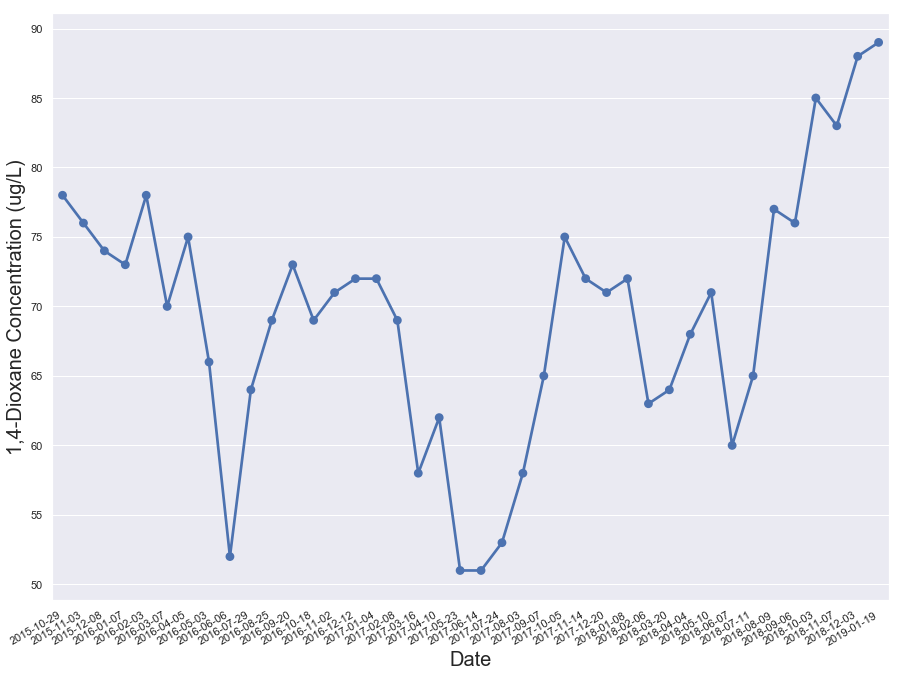

In [112]:
# Build the figure #
fig, ax = plt.subplots(figsize=(15, 12))
ax = sns.pointplot(x='date', y='dioxane_conc', data=df)
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('1,4-Dioxane Concentration (ug/L)', fontsize=20)

# put the labels at 45deg since they tend to be too long
fig.autofmt_xdate()
plt.show()